What is the relation between "holding time" and positive returns in the stock market? 
====================

I want to reproduce the [following plot](https://g.foolcdn.com/misc-assets/hold%20stocks%20longer%20graph.png) that I saw made by Motley Fool. 

- [ ] include original plot
- [ ] make plots look as much as original one
- [ ] 

# Download data

In [1]:
periodo='max'
dt='1d'

How many trials?

In [2]:
n=3000

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import nmmn.finance as nf
import yfinance as yf
import pandas as pd
import tqdm

In [9]:
ibov=yf.download(tickers="^BVSP", period=periodo, interval=dt, progress=False)
snp=yf.download(tickers="^GSPC", period=periodo, interval=dt, progress=False)

In [10]:
# obtém o rendimento
ibov=nf.returnsTS(ibov)
snp=nf.returnsTS(snp)

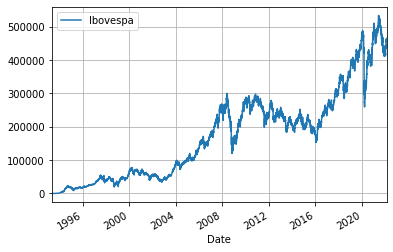

In [155]:
ibov.plot(label="Ibovespa")
grid()
legend()

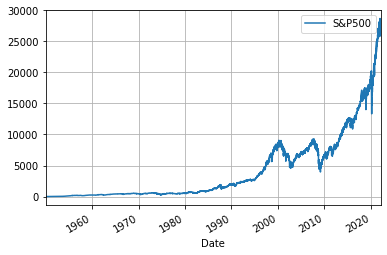

In [156]:
snp.plot(label="S&P500")       
grid()
legend()

# The functions that get the job done

In [162]:
def randReturn(ts,t=1, unit='y'):
    """
    Gets a random date in the TS, and computes the percentage return given the time units provided.
    """
    # gets a random date in the TS
    r=ts.sample()
    
    # gets start and end dates
    t0=r.index.date
    t0=t0[0]
    t1=r.index.date+pd.to_timedelta(t,unit=unit)
    i=ts.index.get_loc(t1[0], method='nearest')
    t1=ts.index.date[i]
    
    return ts[t1]-ts[t0]

In [3]:
def positiveReturns(ts,t,unit):
    """
    Computes fraction of positive returns given the time parameters.
    """
    ret=[]

    for i in tqdm.tqdm(range(n)):
        ret.append(randReturn(ts,t,unit))

    ret=array(ret)
    
    # what fraction of the returns are positive?
    return size(where(ret>0))/ret.size*100

# Calculations

In [5]:
t=[1,30,1,5,10,20]
units=['d','d','y','y','y','y']

## S&P500

In [ ]:
for i in :
    

In [6]:
positiveReturns(snp,1,'d')

NameError: name 'snp' is not defined

## IBOV

computes returns on a random sample

In [178]:
ret=[]

for i in tqdm.tqdm(range(n)):
    ret.append(randReturn(ibov,1,'d'))

ret=array(ret)

100%|██████████| 3000/3000 [00:05<00:00, 545.11it/s]


what fraction of the returns are positive?

In [179]:
size(where(ret>0))/ret.size*100

42.36666666666667

# Results

## S&P500, $t>1950$

| period | fraction % |
|--------|------------|
| 1 day  | 43         |
| 1 month| 62         |
| 1 year | 73         |
| 5 years| 86         |
|10 years| 93         |
|20 years| 99         |

## Ibovespa, $t>1993$

| period | fraction % |
|--------|------------|
| 1 day  | 43         |
| 1 month| 60         |
| 1 year | 65         |
| 5 years| 86         |
|10 years| 97         |
|20 years| 97         |

# Sandbox

In [128]:
i=where(ret>0)

In [131]:
size(i)/ret.size

0.612